In [1]:
import anndata as ad
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%load_ext autoreload

%autoreload 2
from spatial_compare import  SpatialCompare 

# Load Data
Here I have taken 4 small regions from different sections of Xenium data from the marmoset brain

In [2]:

ad1 = ad.read_h5ad("data/CJ_BG_mini1.h5ad")
ad2 = ad.read_h5ad("data/CJ_BG_mini2.h5ad")
ad3 = ad.read_h5ad("data/CJ_BG_mini3.h5ad")
ad4 = ad.read_h5ad("data/CJ_BG_mini4.h5ad")


### Start by creating the `SpatialCompare` object
### the anndata objects used in `spatial_compare` need a few things:

1. a category (column in .obs shared in both AnnData objects )
2. an `.obsm` key where spatial location data is stored
3. names for the datasets

This has some validation of shared genes and checks for the  shared `category` column in the `.obs`



In [5]:
sc = SpatialCompare(ad1, ad2, data_names=["mini1", "mini2"], category='AIT15_Subclass_name')

input anndata objects have 541 shared genes


In [ ]:
### next we'll run spatial compare

### next we'll run spatial_compare
This generates (potentially many) plots:
1. a spatial plot of the 2 datasets, colored by the user-supplied category
2. population comparisons 
3. Gene expression plots for each group
4. Summary plots of transcript detection differences across cell types and genes

In [15]:
d1d2_cells = [g for g in ad1.obs.AIT15_Subclass_name.unique() if "D1" in g or "D2" in g]
non_d1d2_cells = [g for g in ad1.obs.AIT15_Subclass_name.unique() if g not in d1d2_cells]

/Users/brianl/projects/spatial_compare/spatial_compare.py:99: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(markerscale=5)
/Users/brianl/projects/spatial_compare/spatial_compare.py:111: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(markerscale=5)


at least 1 input has less than 10 cells in AIT15_Subclass_name == D2-Striosome
at least 1 input has less than 10 cells in AIT15_Subclass_name == D1-ShellOT
at least 1 input has less than 10 cells in AIT15_Subclass_name == D2-ShellOT
dict_keys(['D1-Matrix', 'D2-Matrix', 'D1-Striosome', 'D2-Hybrid-MCHR2', 'D1-NUDAP', 'D1D2-Hybrid'])


True

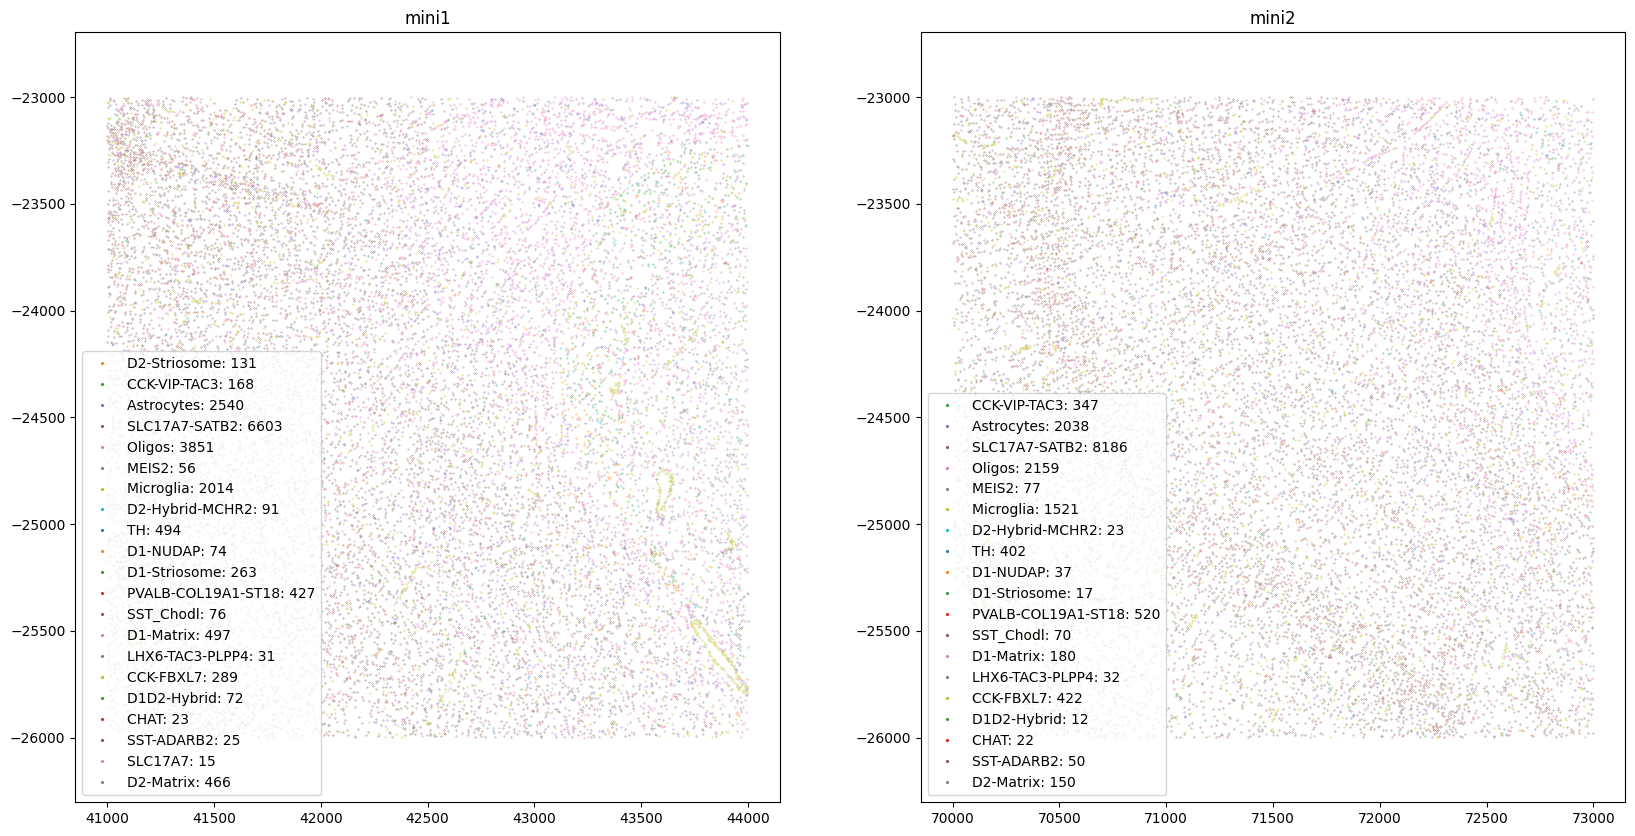

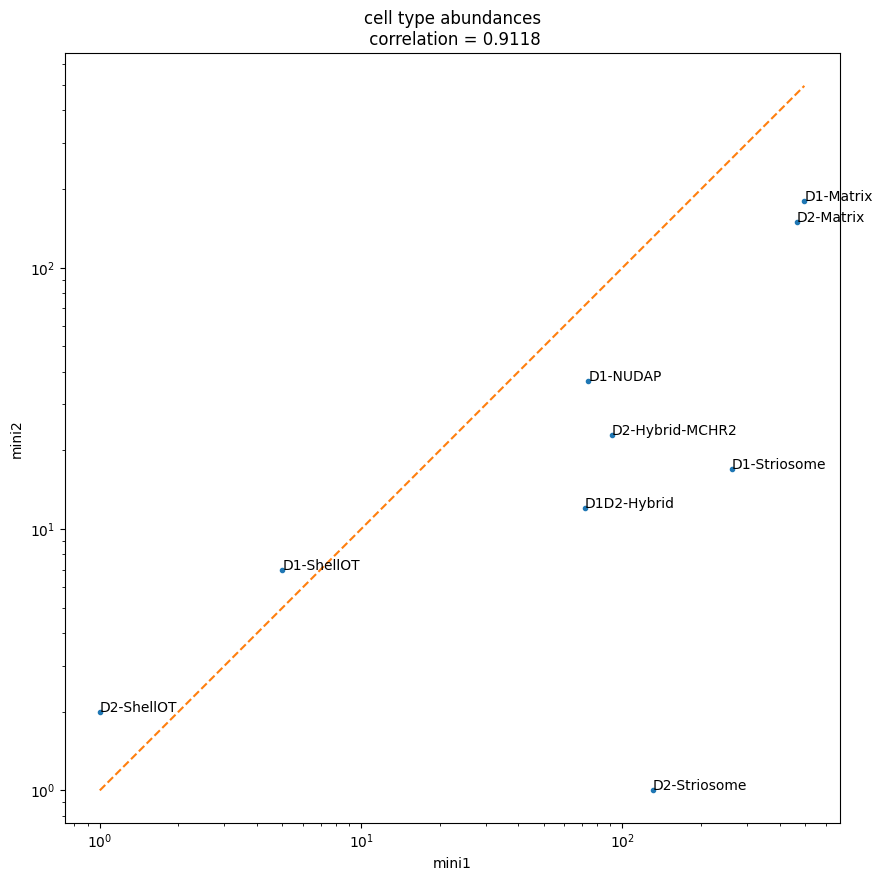

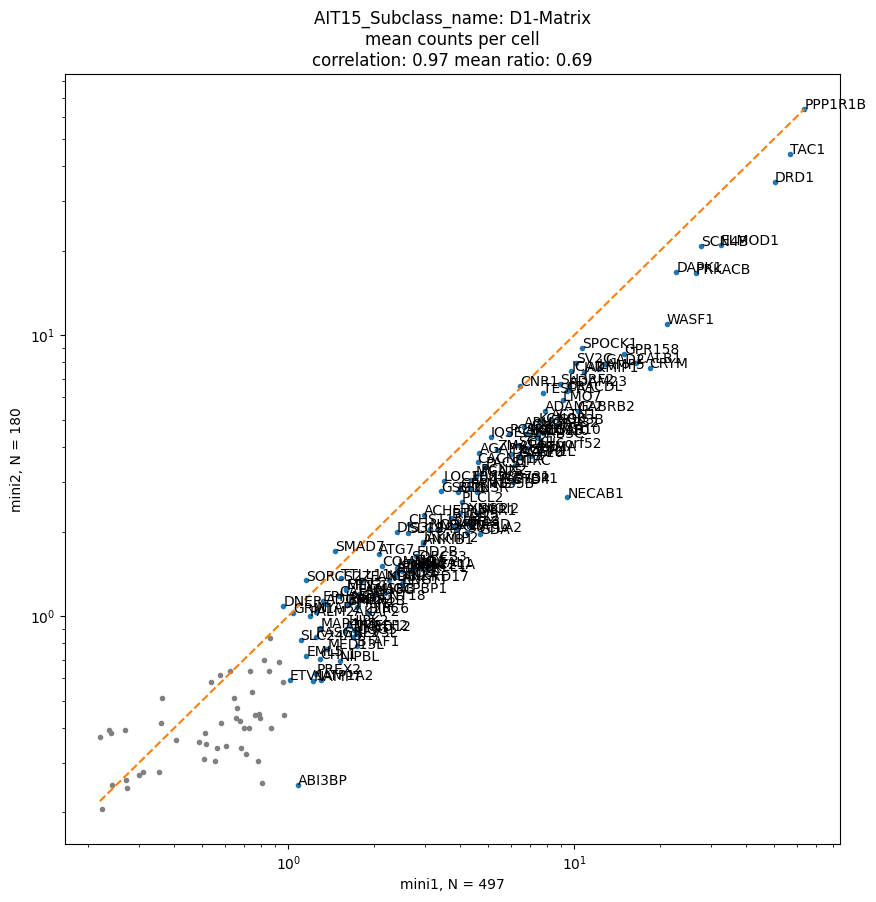

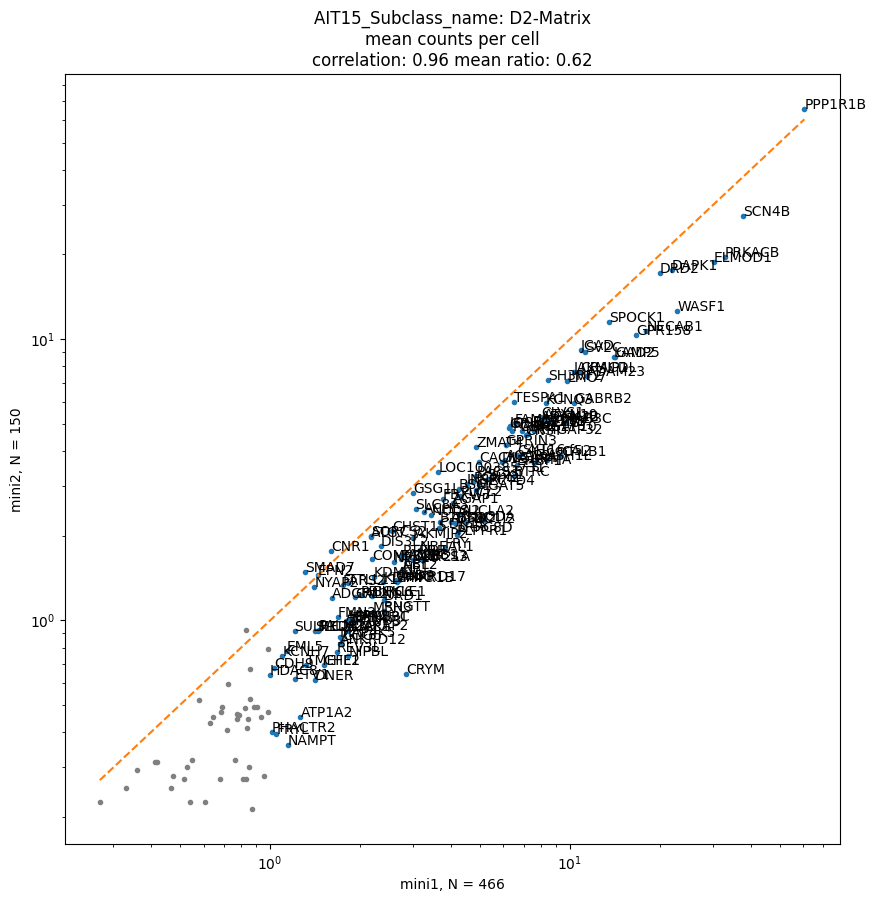

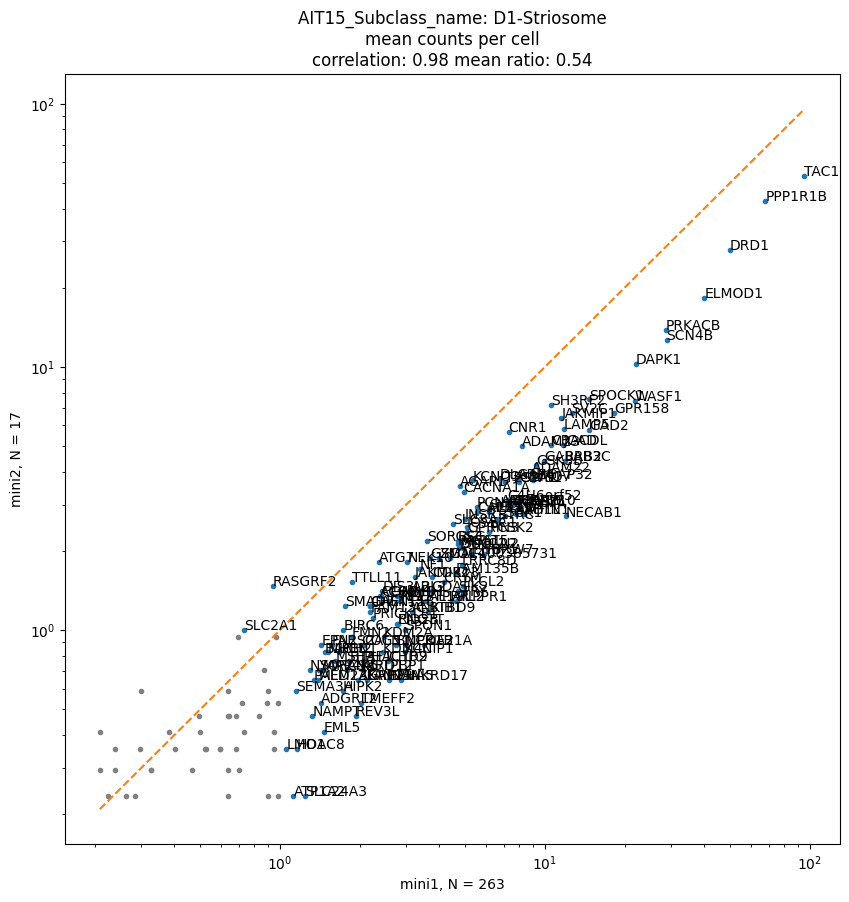

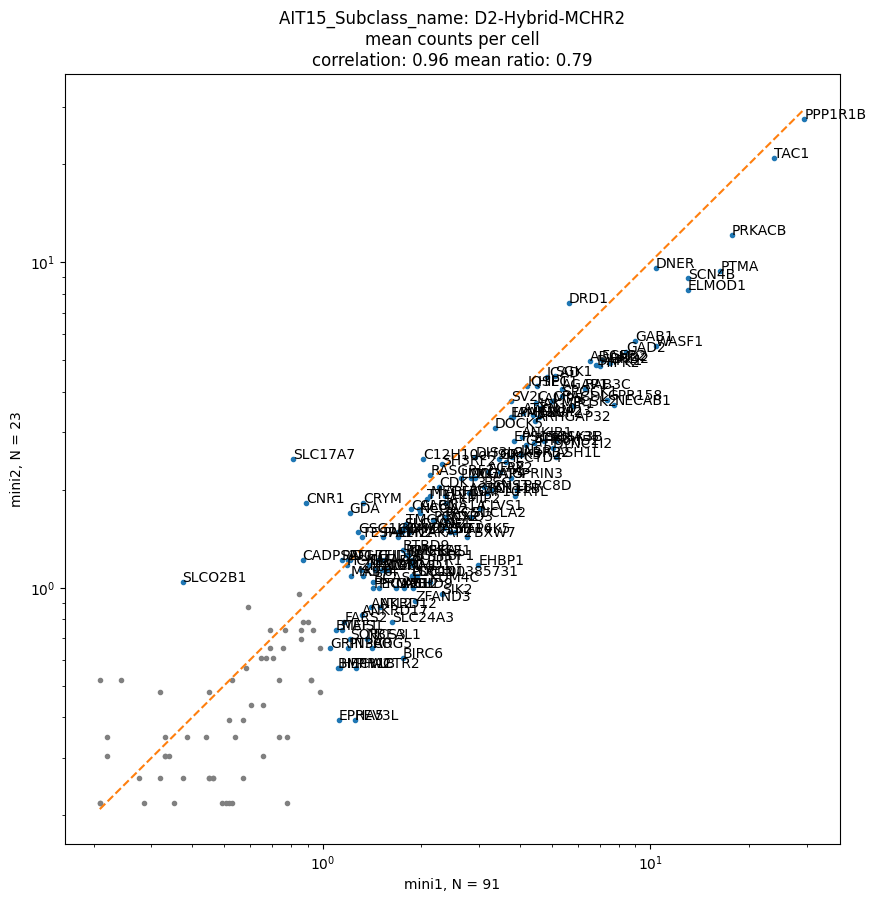

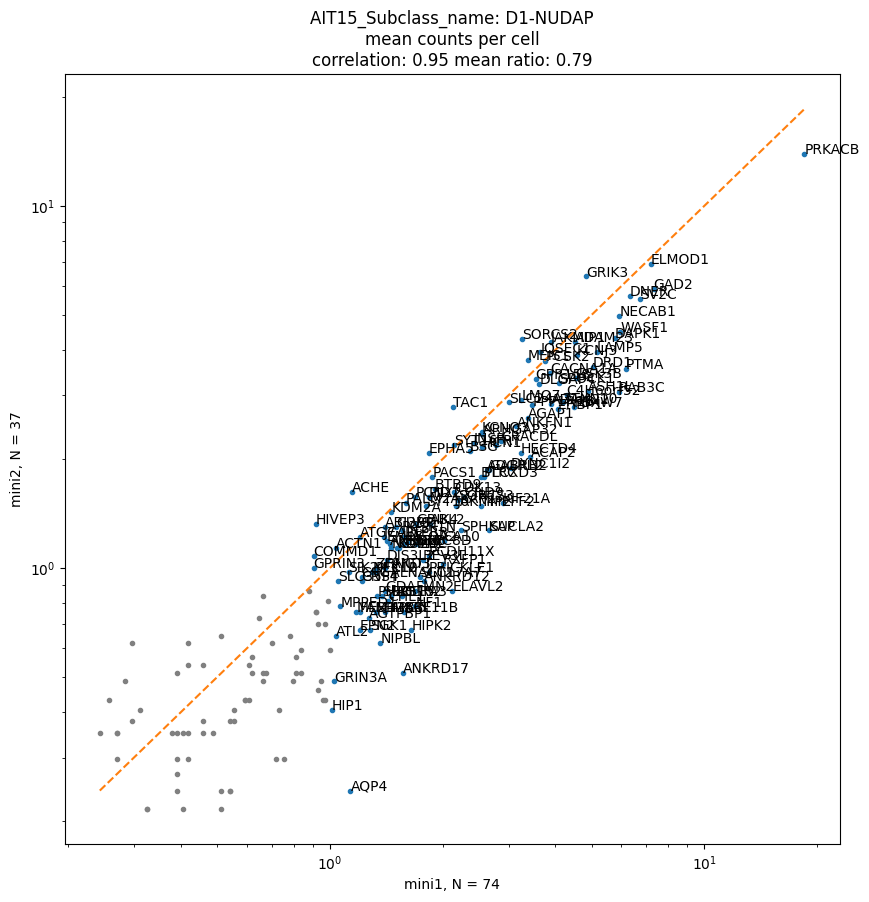

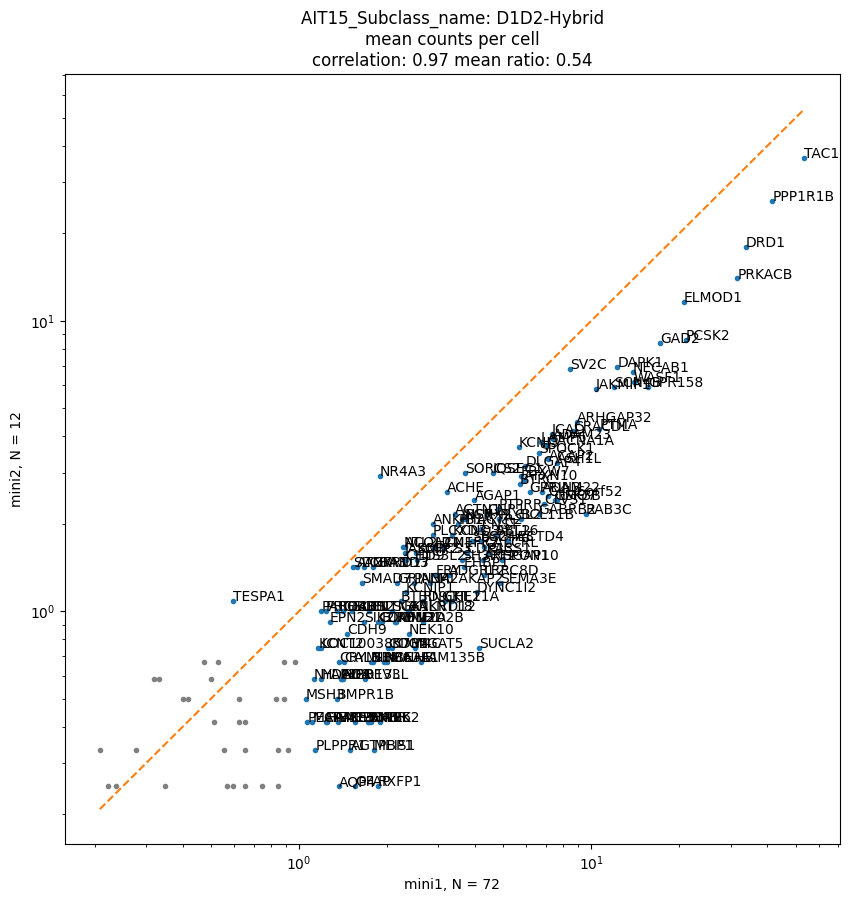

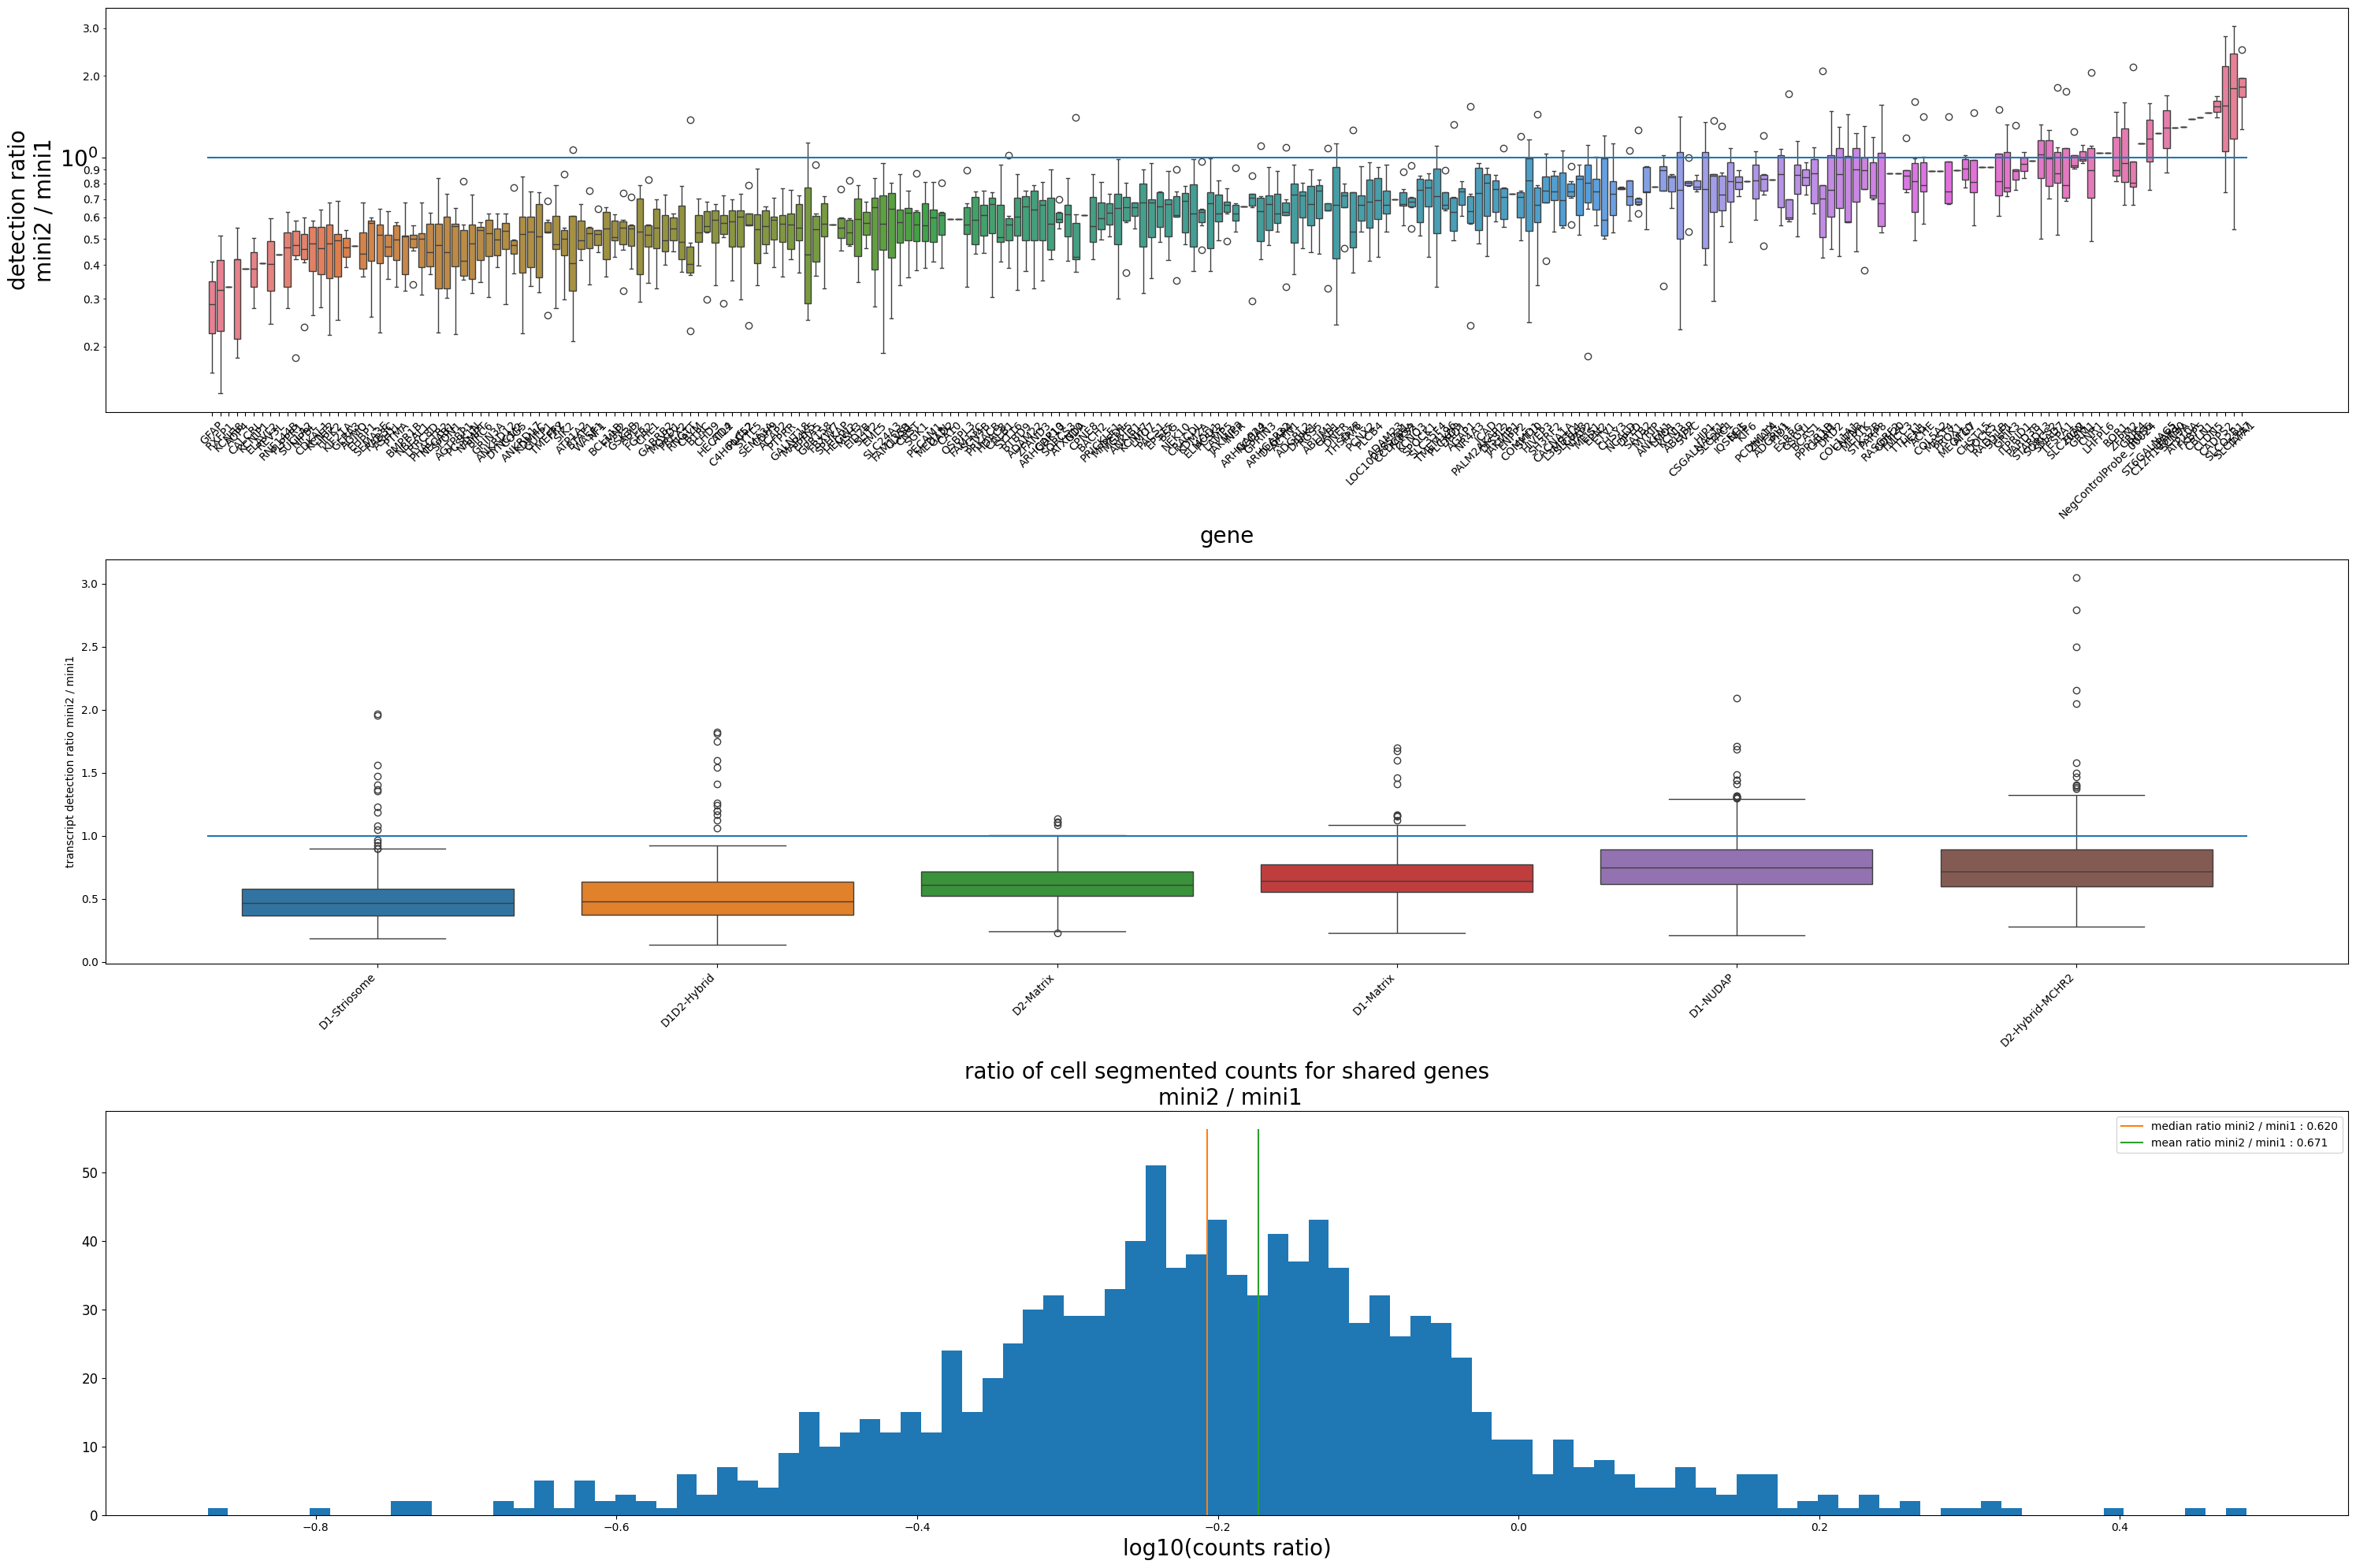

In [20]:
sc.run_and_plot(category_values = d1d2_cells, min_mean_expression=.2)



/Users/brianl/projects/spatial_compare/spatial_compare.py:99: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(markerscale=5)
/Users/brianl/projects/spatial_compare/spatial_compare.py:111: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(markerscale=5)


at least 1 input has less than 10 cells in AIT15_Subclass_name == SLC17A7
at least 1 input has less than 10 cells in AIT15_Subclass_name == TAC3-LHX8-PLPP4
at least 1 input has less than 10 cells in AIT15_Subclass_name == GABA_Gluta_PVALB-Meis2
at least 1 input has less than 10 cells in AIT15_Subclass_name == Gluta_PVALB-CDH23
at least 1 input has less than 10 cells in AIT15_Subclass_name == SN_STH_GPe-MEIS2-OTX2
at least 1 input has less than 10 cells in AIT15_Subclass_name == NAc-LHX8
dict_keys(['SLC17A7-SATB2', 'Oligos', 'Astrocytes', 'Microglia', 'TH', 'PVALB-COL19A1-ST18', 'CCK-FBXL7', 'CCK-VIP-TAC3', 'SST_Chodl', 'MEIS2', 'LHX6-TAC3-PLPP4', 'SST-ADARB2', 'CHAT'])


True

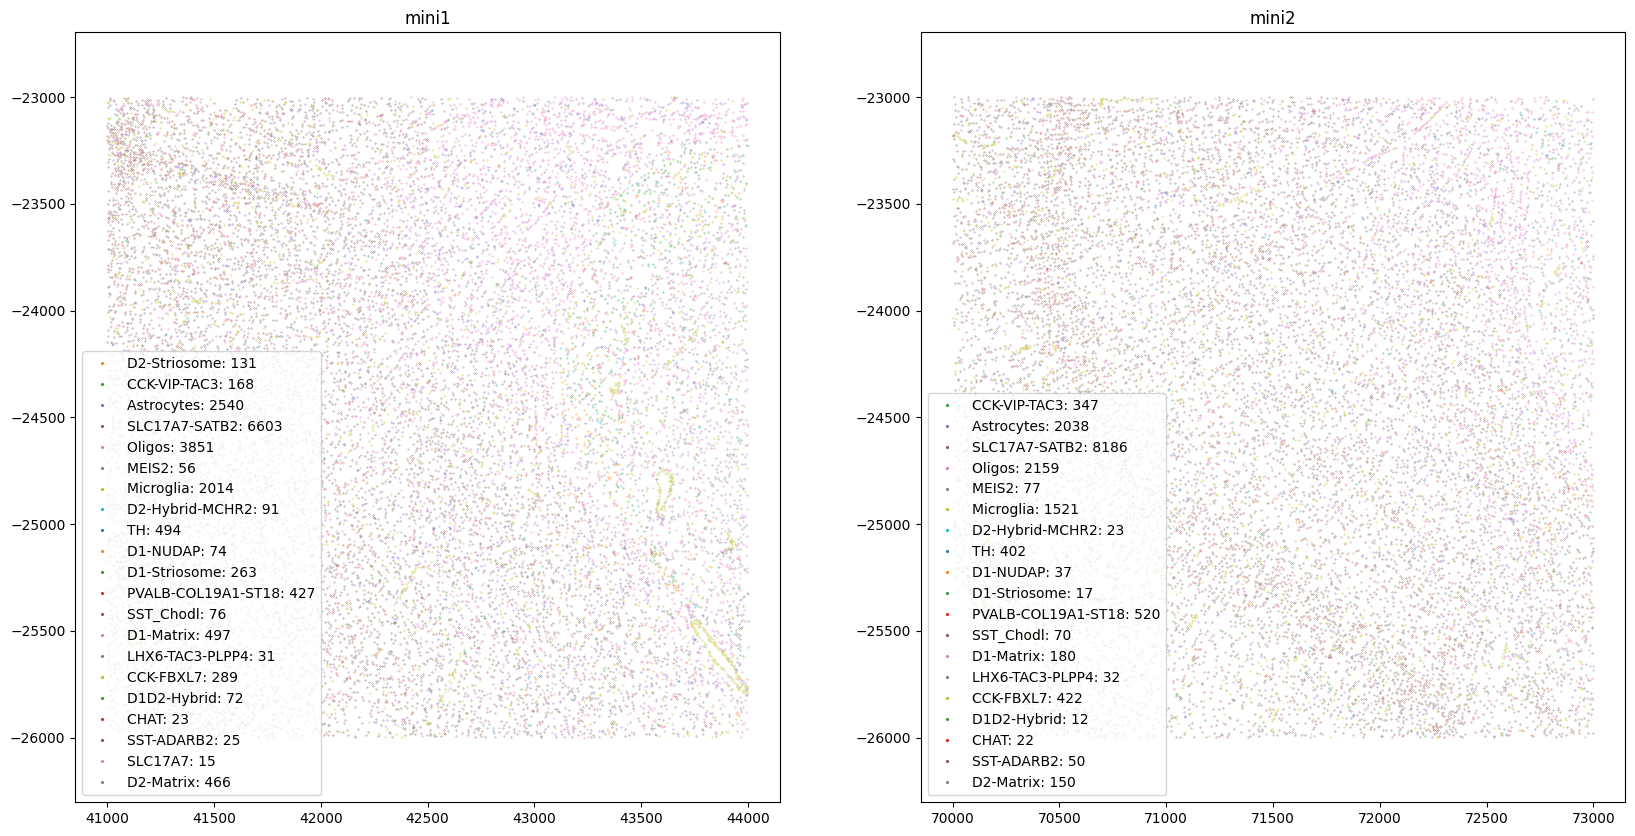

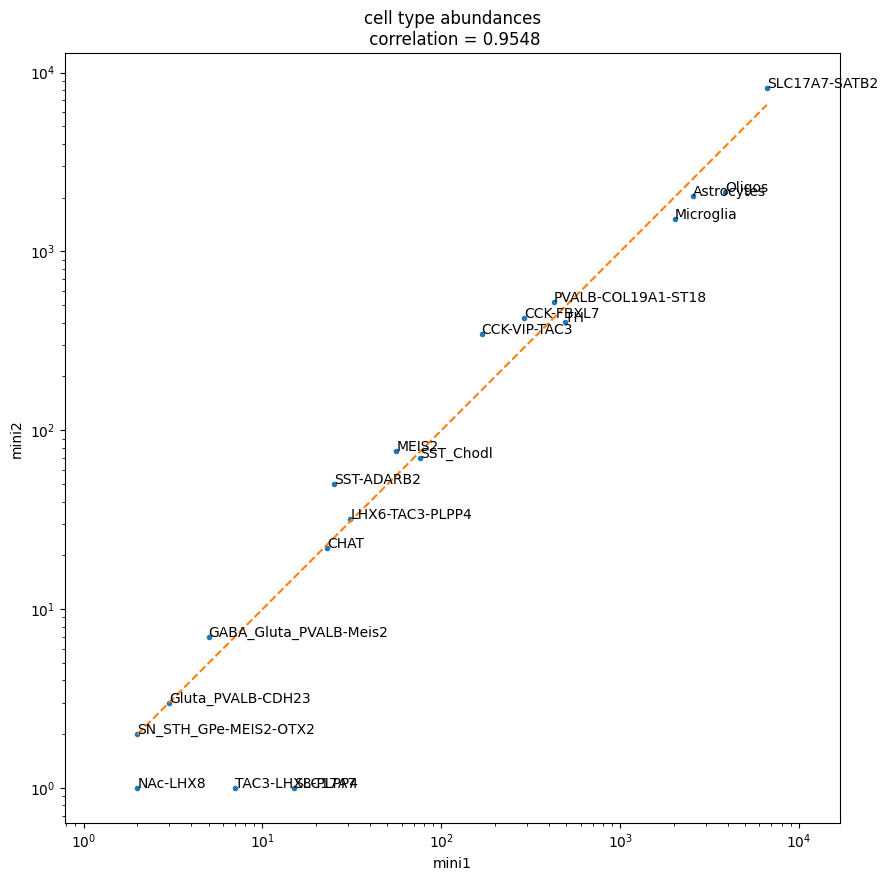

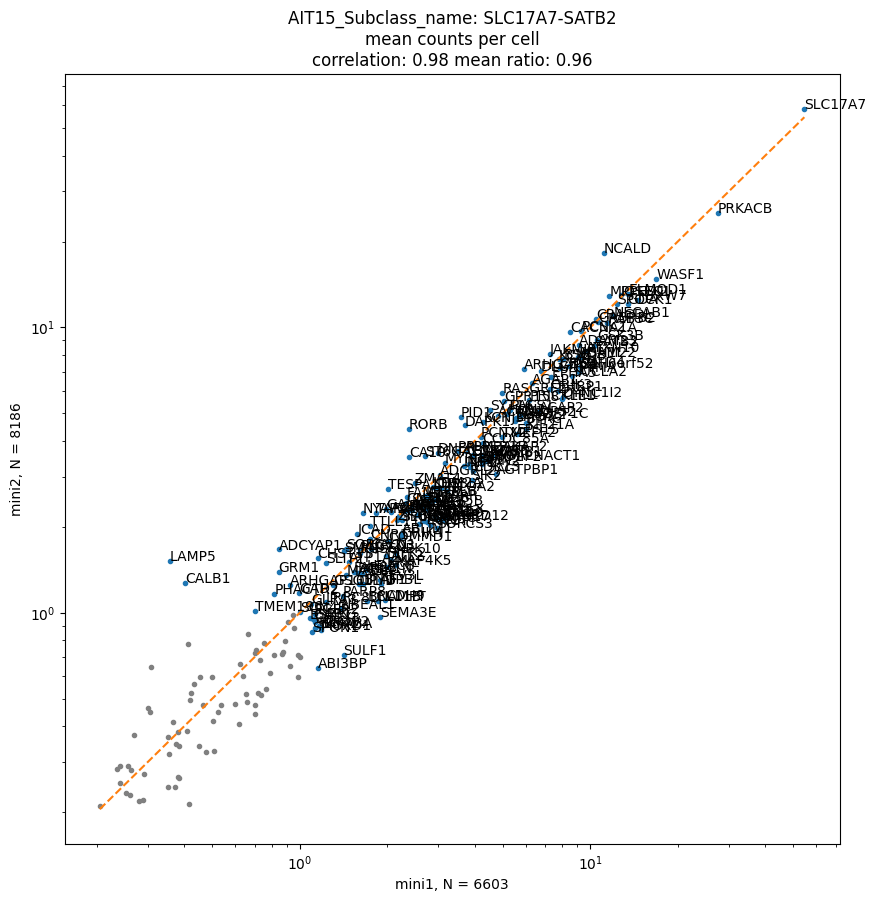

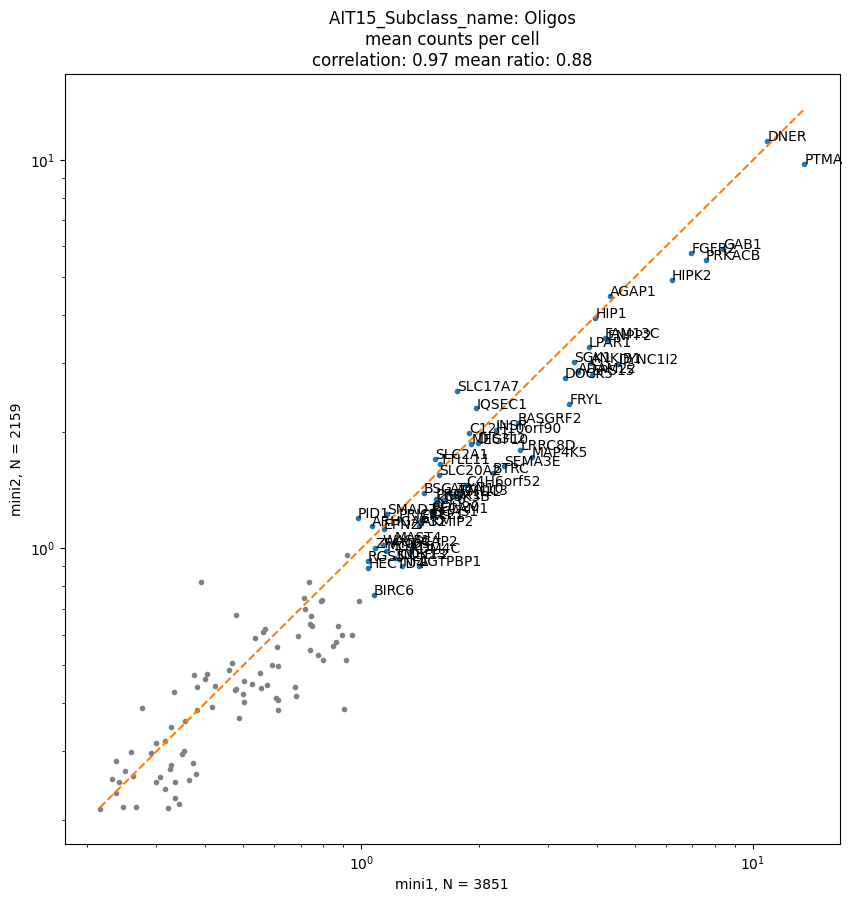

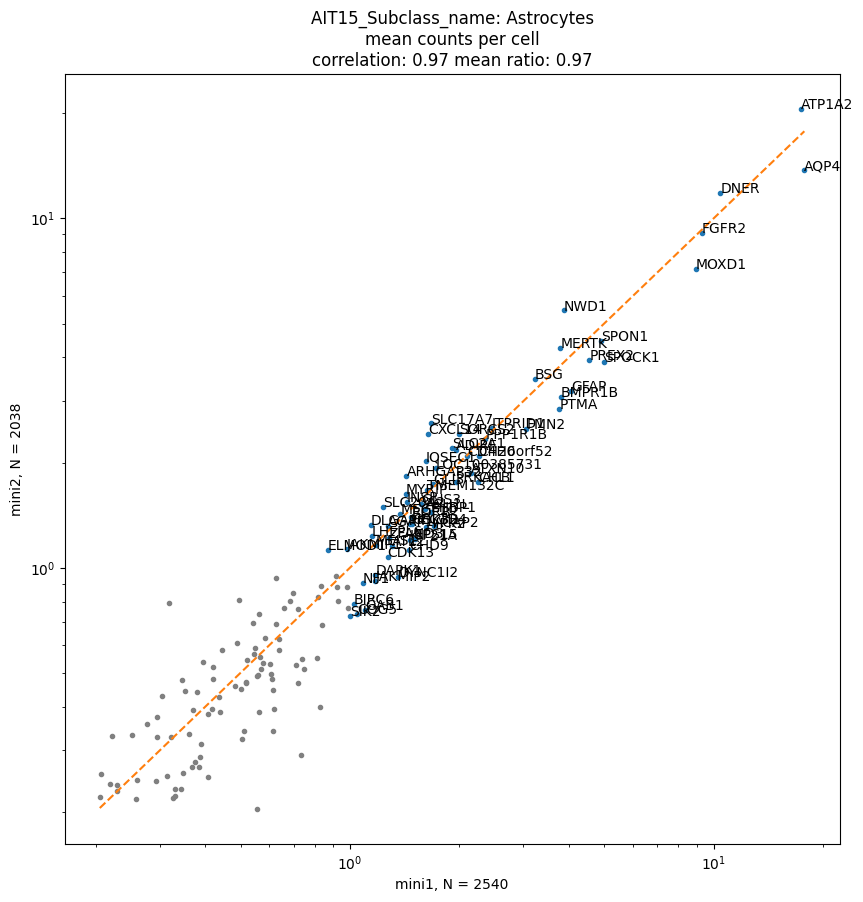

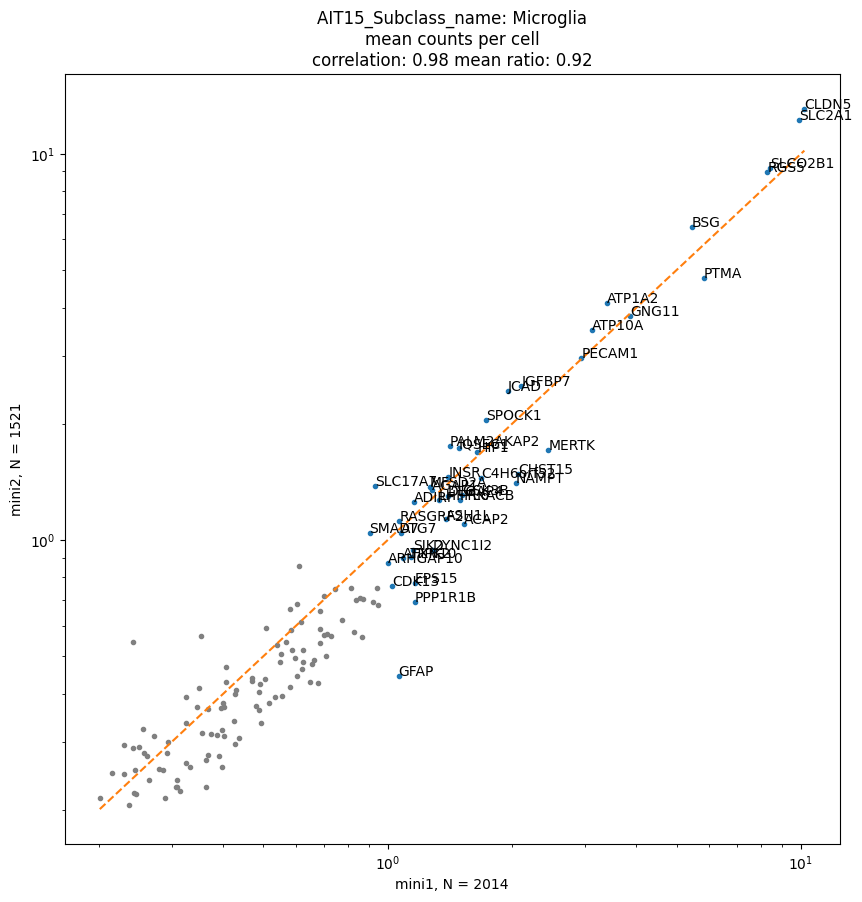

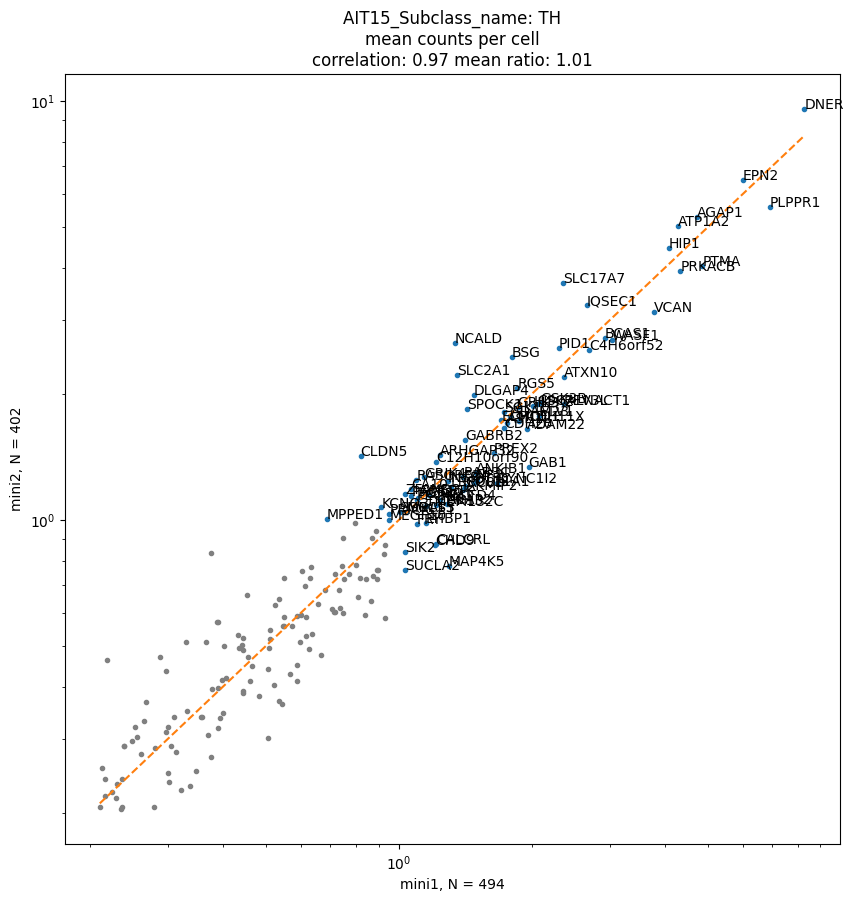

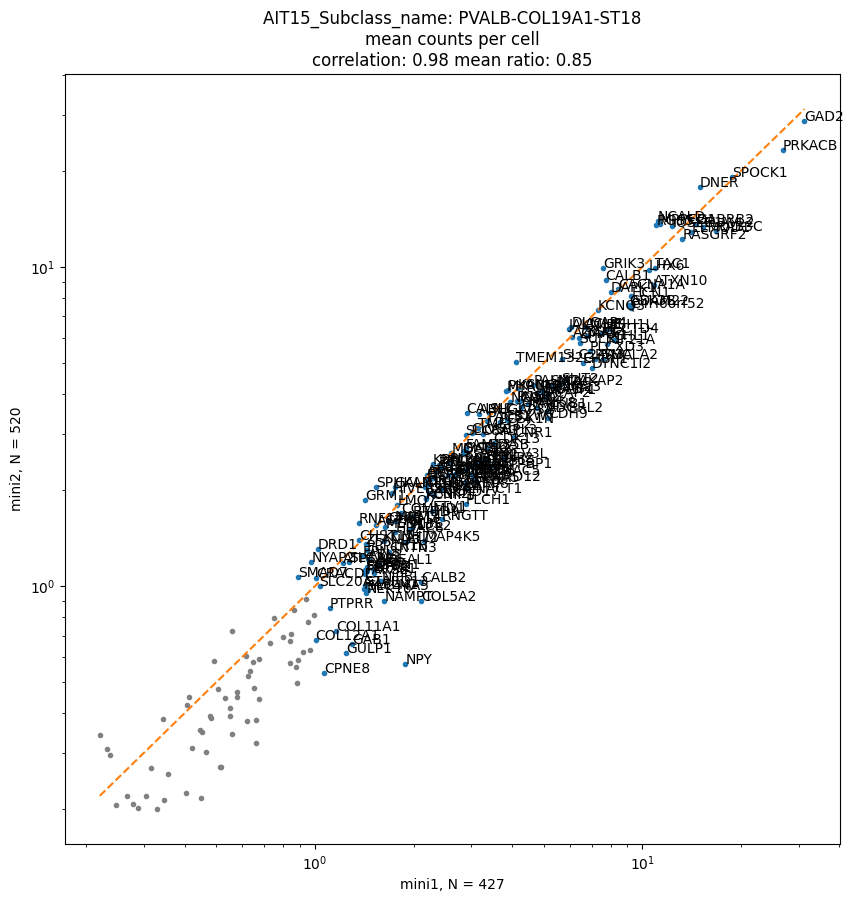

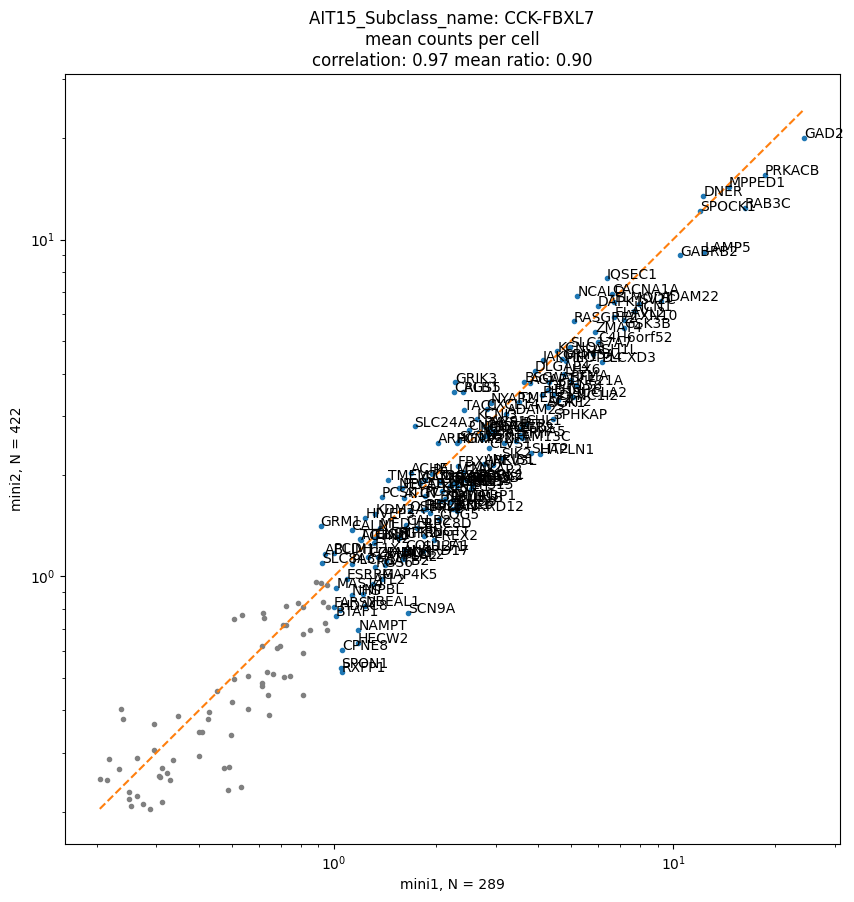

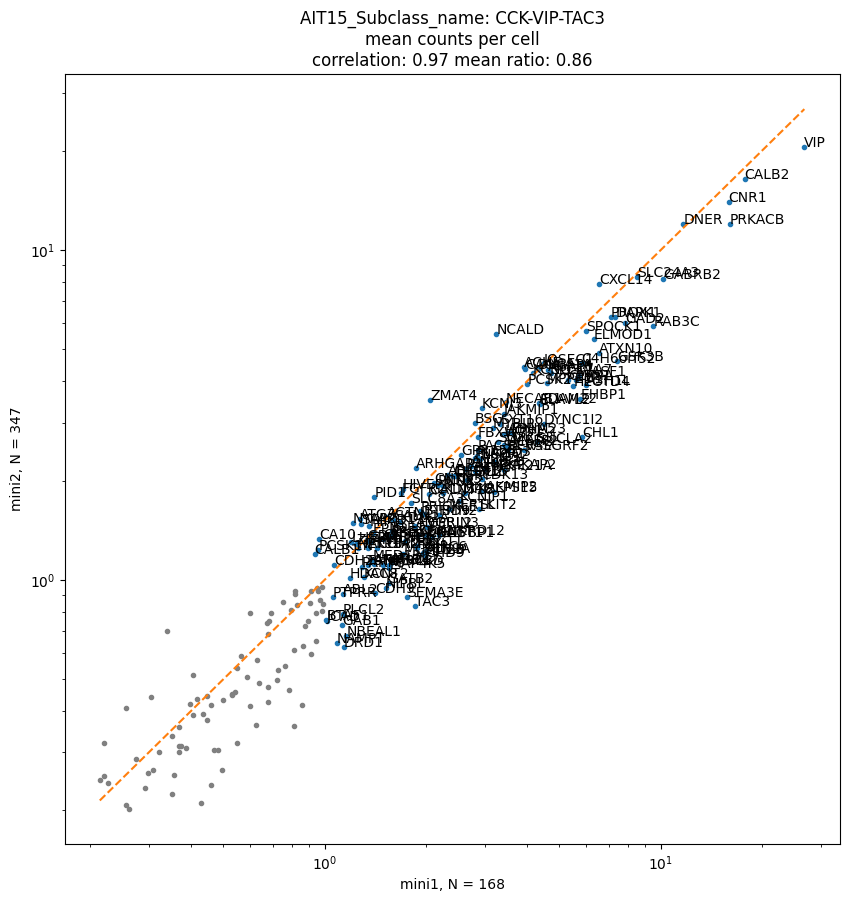

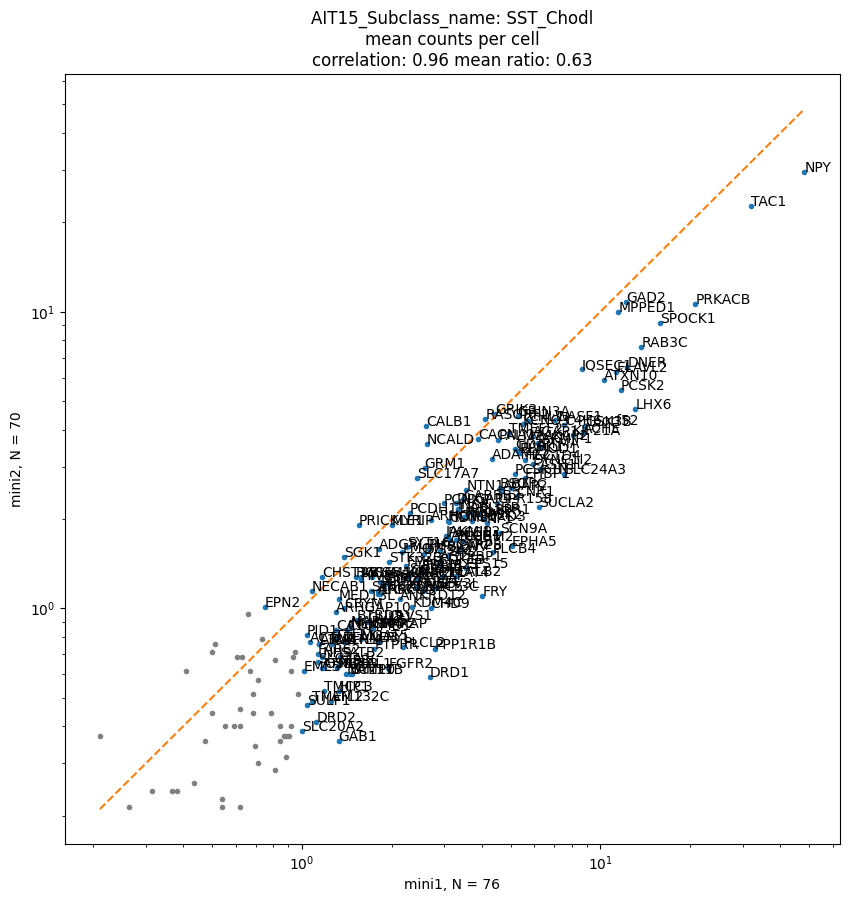

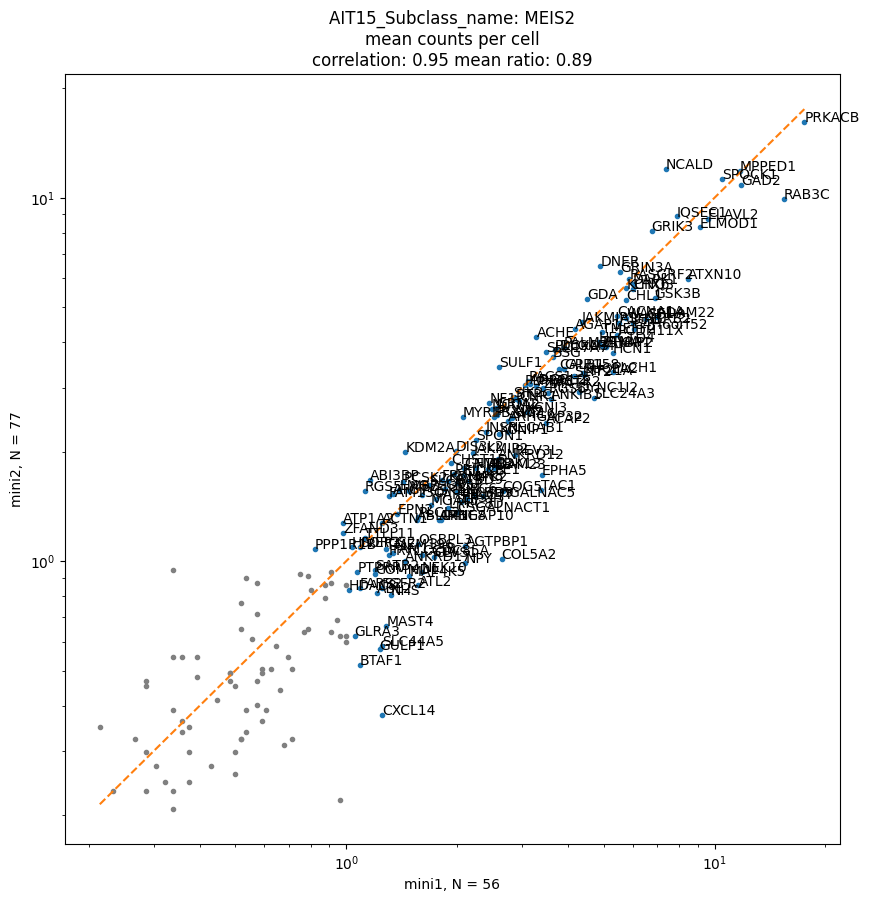

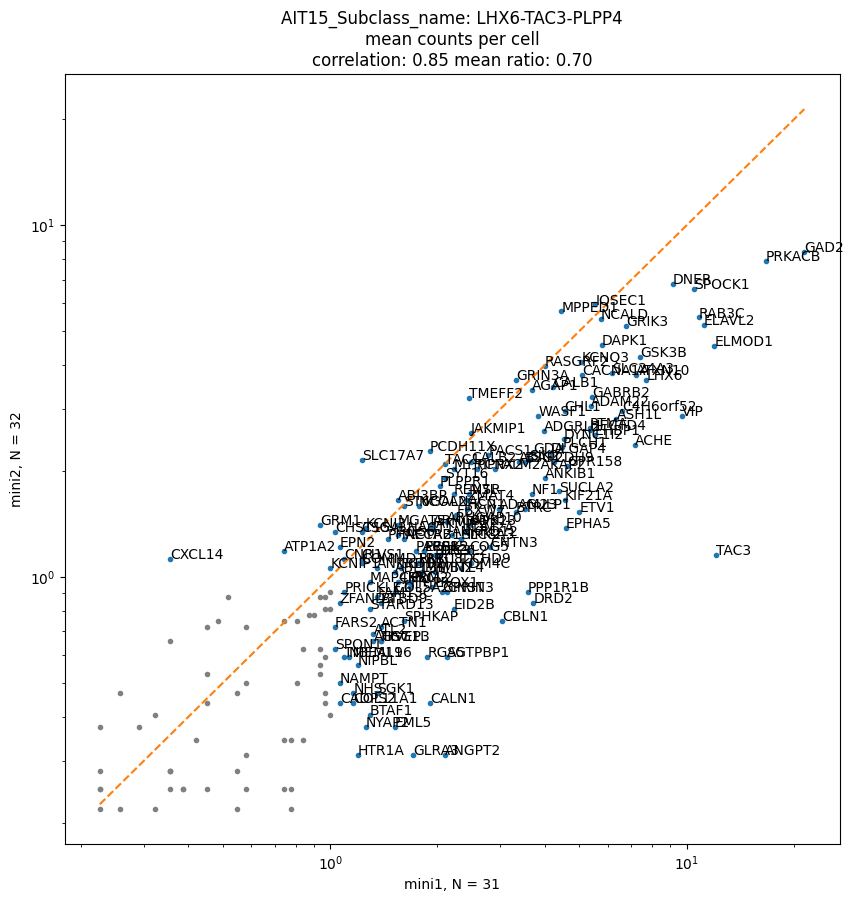

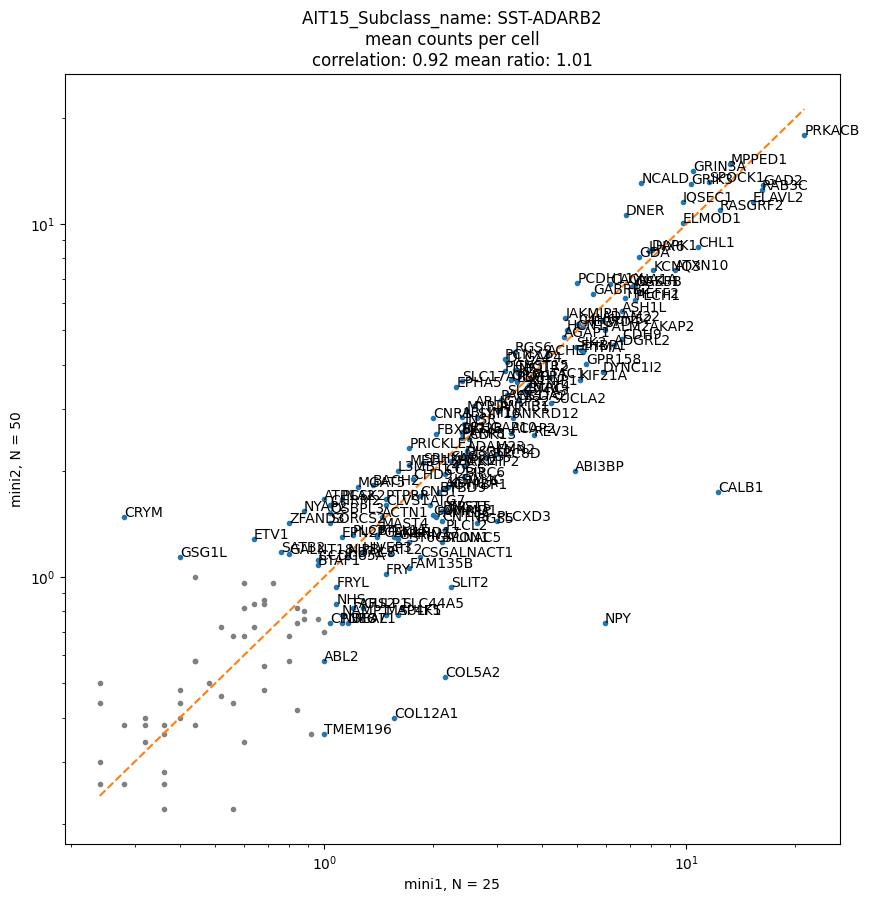

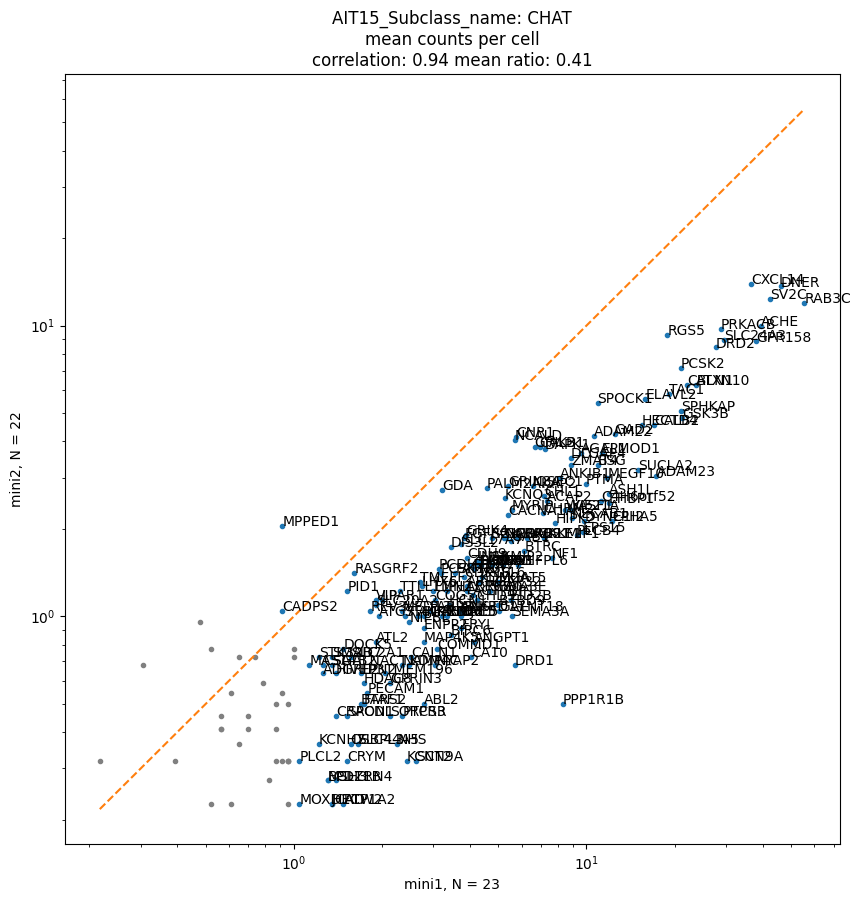

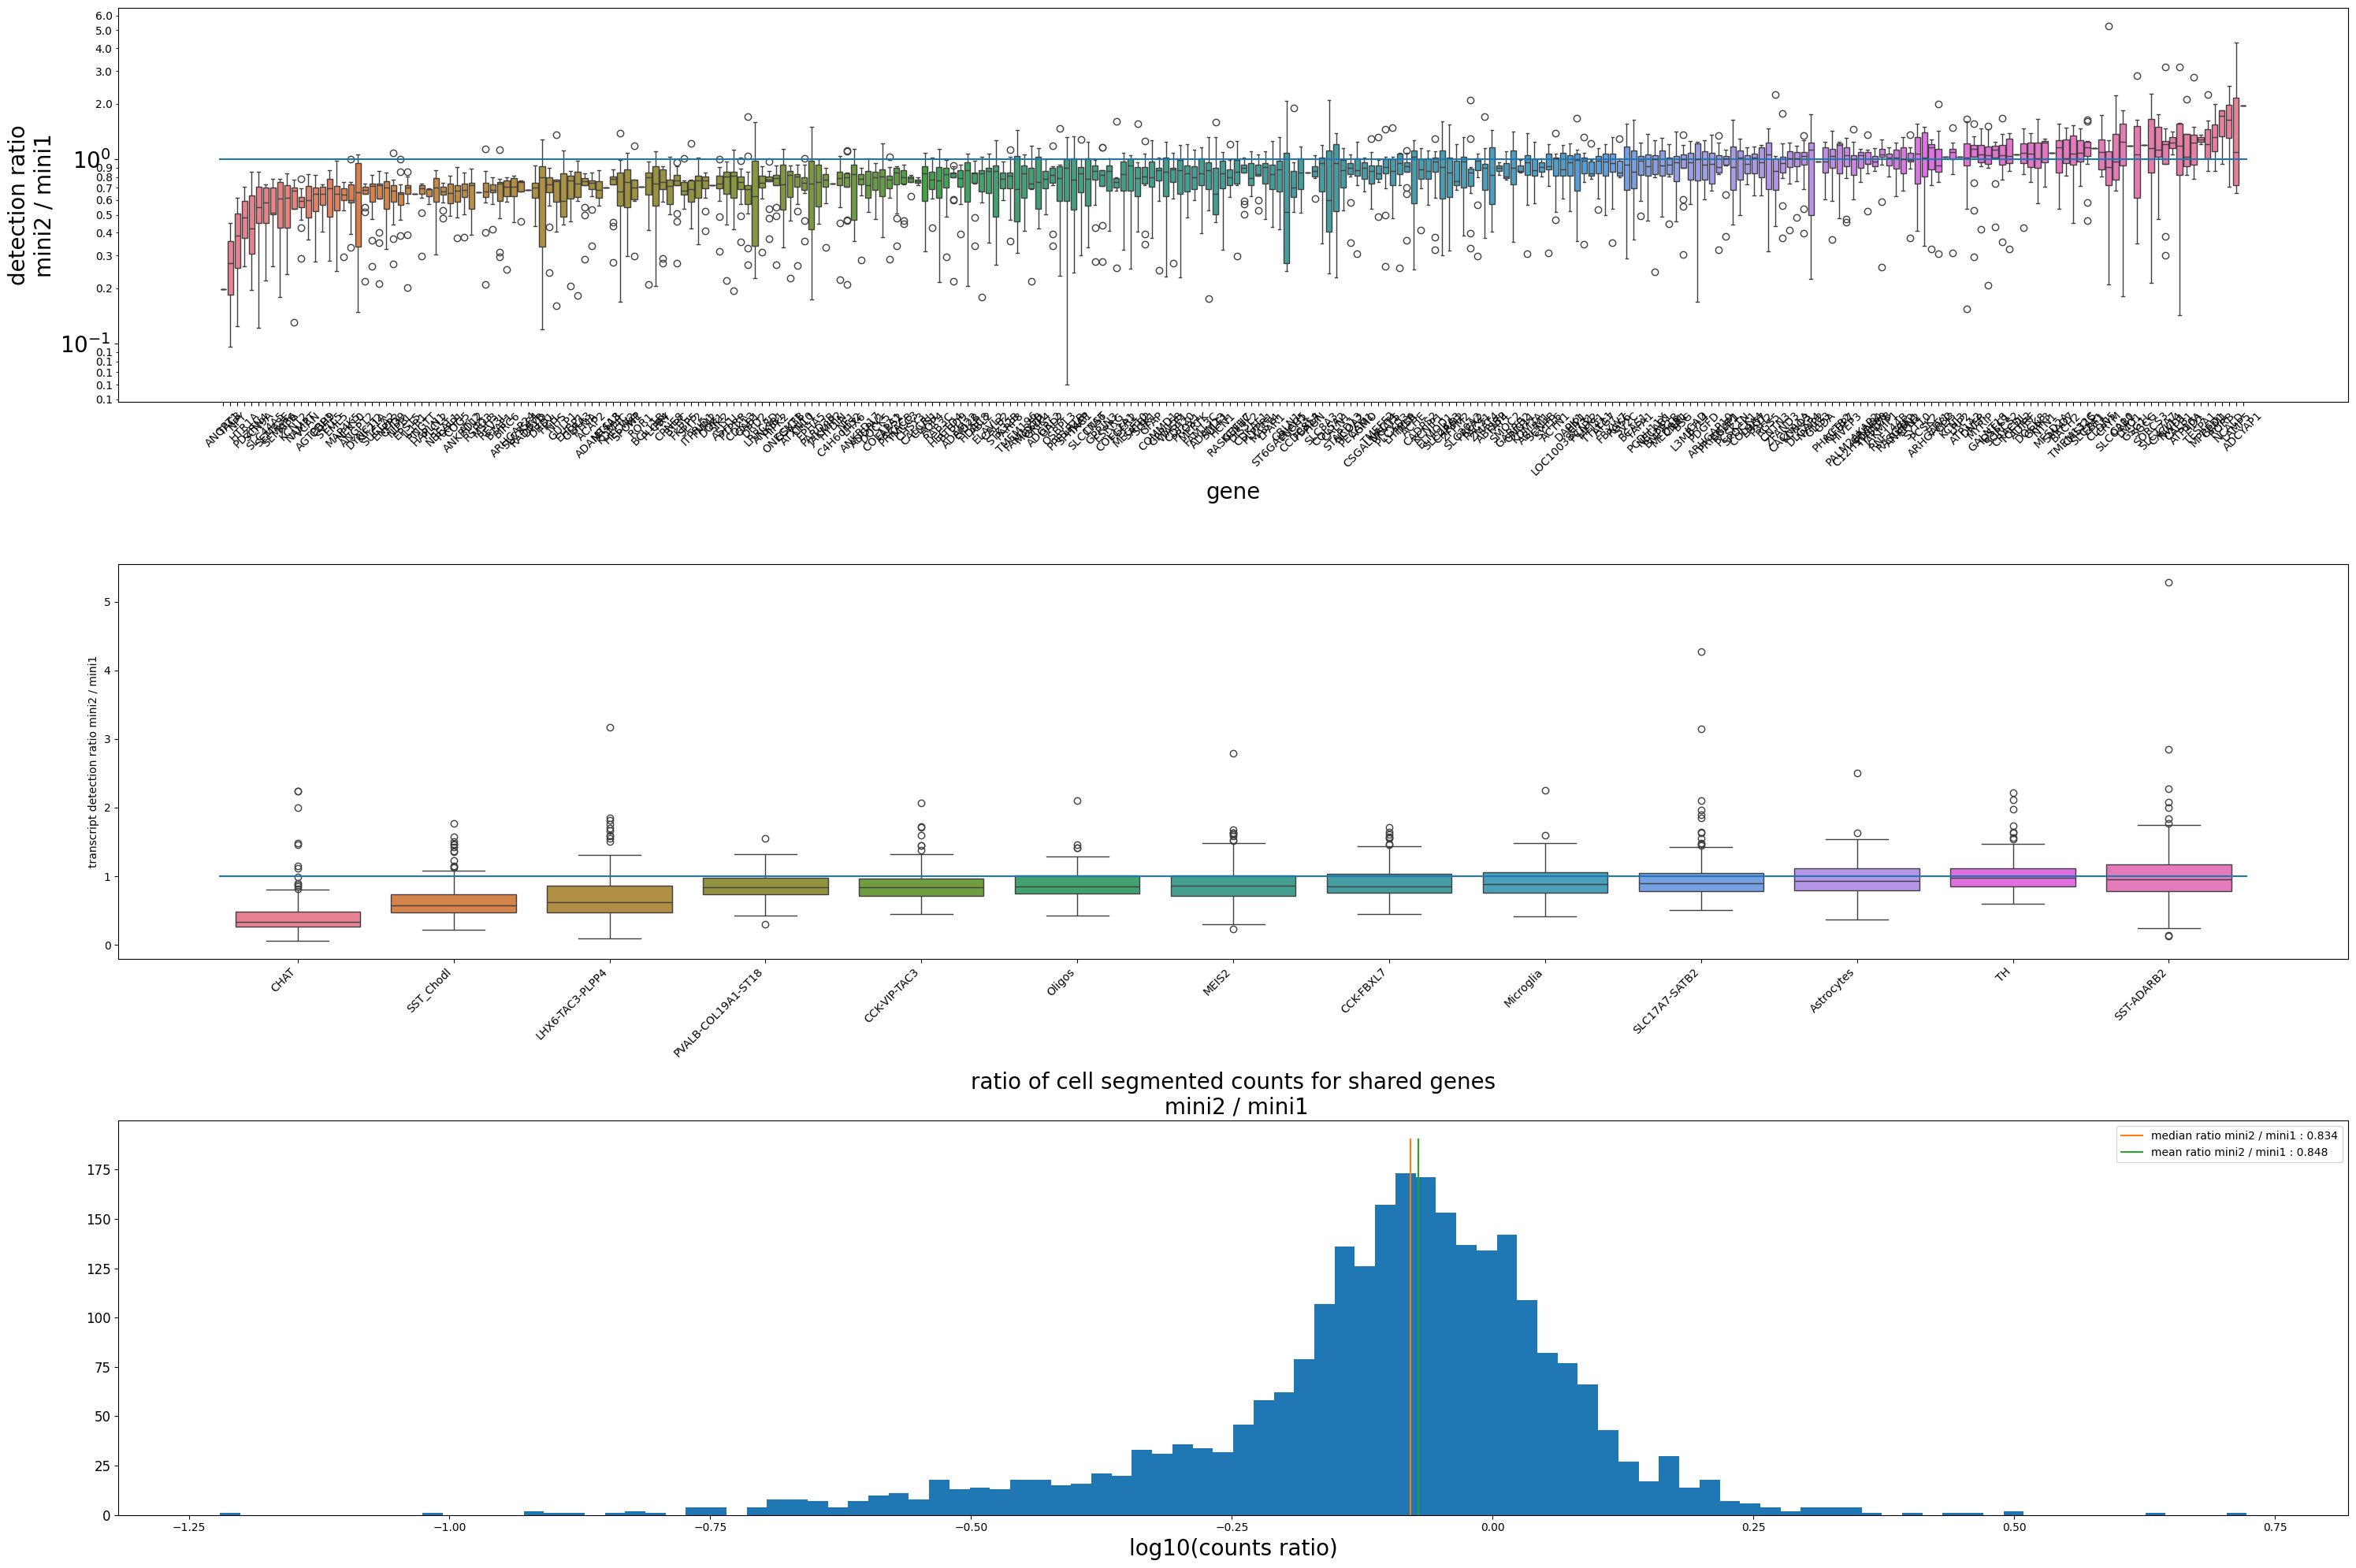

In [17]:
sc.run_and_plot(category_values = non_d1d2_cells)

# We can also use de novo clustering to define groups of cells
`spatial_compare.de_novo_cluster` uses 2 rounds of Leiden clustering with default parameters. PCs are recalculated on each 1st-round cluster for the second round. The clusters that match by highest correlation are used as the new categories. 

In [5]:
sc.de_novo_cluster()

/Users/brianl/projects/spatial_compare/spatial_compare.py:322: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(to_cluster, n_iterations=n_iterations[0])


: 

: 

In [ ]:
sc.run_and_plot()